In [1]:
import pandas as pd
#import plotly.plotly as pyl
import chart_studio.plotly as pyl
import plotly.graph_objs as go
import matplotlib.pyplot as plt

%matplotlib inline 

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df_logs = pd.read_parquet("../data/logs.parquet")
df_loc = pd.read_parquet("../data/loc.parquet")
df_tops = pd.read_parquet("../data/tops.parquet")

In [3]:
##################################
# CLEANING
##################################
df_logs = df_logs[df_logs['GR'] >= 0]
well_data = df_loc.merge(df_tops, how='inner', left_index=True, right_index=True)

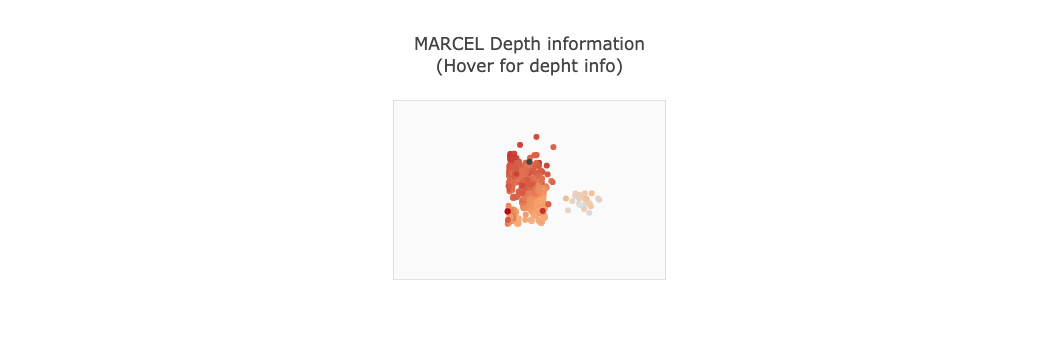

In [4]:
top = "MARCEL"

df_loc[top] = df_tops[top]
data = [ dict(
        type = 'scattergeo',
        lon = df_loc['Longitude'],
        lat = df_loc['Latitude'],
        text = df_loc[top],
        mode = 'markers',
        marker = dict(
            color = df_loc[top],
        )
        )]

layout = dict(
        title = '{0} Depth information<br>(Hover for depht info)'.format(top),
        colorbar = True,
        geo = dict(
            scope='europe',
            projection=dict( type='natural earth',scale=100 ),
            center = dict( lon=df_loc["Longitude"].mean(), lat = df_loc["Latitude"].mean()),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='niobrara' )

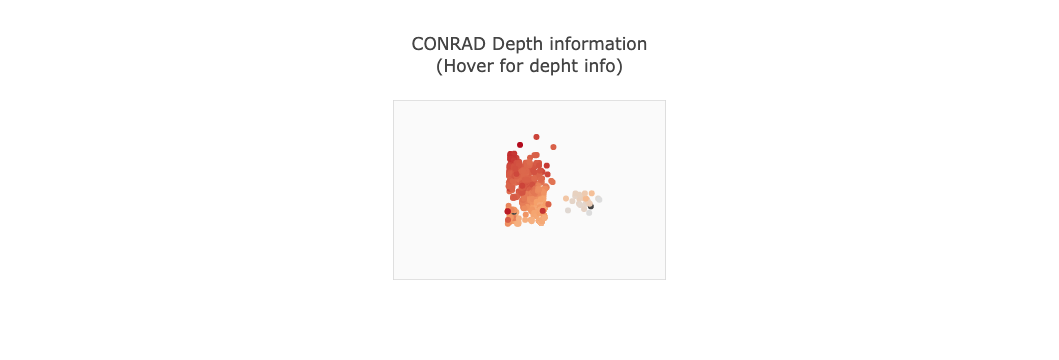

In [5]:
top = "CONRAD"

df_loc[top] = df_tops[top]
data = [ dict(
        type = 'scattergeo',
        lon = df_loc['Longitude'],
        lat = df_loc['Latitude'],
        text = df_loc[top],
        mode = 'markers',
        marker = dict(
            color = df_loc[top],
        )
        )]

layout = dict(
        title = '{0} Depth information<br>(Hover for depht info)'.format(top),
        colorbar = True,
        geo = dict(
            scope='europe',
            projection=dict( type='natural earth',scale=100 ),
            center = dict( lon=df_loc["Longitude"].mean(), lat = df_loc["Latitude"].mean()),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='niobrara' )

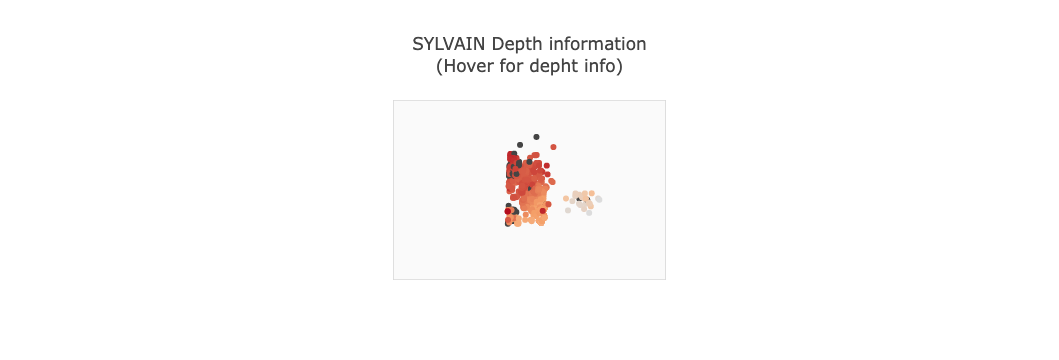

In [6]:
top = "SYLVAIN"

df_loc[top] = df_tops[top]
data = [ dict(
        type = 'scattergeo',
        lon = df_loc['Longitude'],
        lat = df_loc['Latitude'],
        text = df_loc[top],
        mode = 'markers',
        marker = dict(
            color = df_loc[top],
        )
        )]

layout = dict(
        title = '{0} Depth information<br>(Hover for depht info)'.format(top),
        colorbar = True,
        geo = dict(
            scope='europe',
            projection=dict( type='natural earth',scale=100 ),
            center = dict( lon=df_loc["Longitude"].mean(), lat = df_loc["Latitude"].mean()),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
iplot( fig, validate=False, filename='niobrara' )

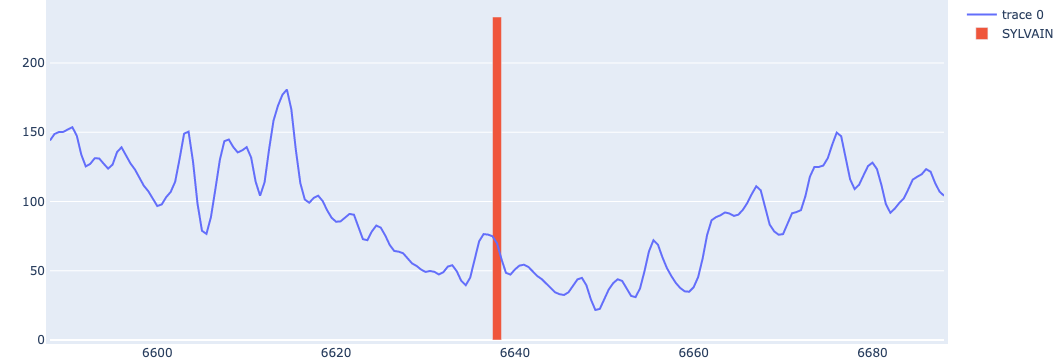

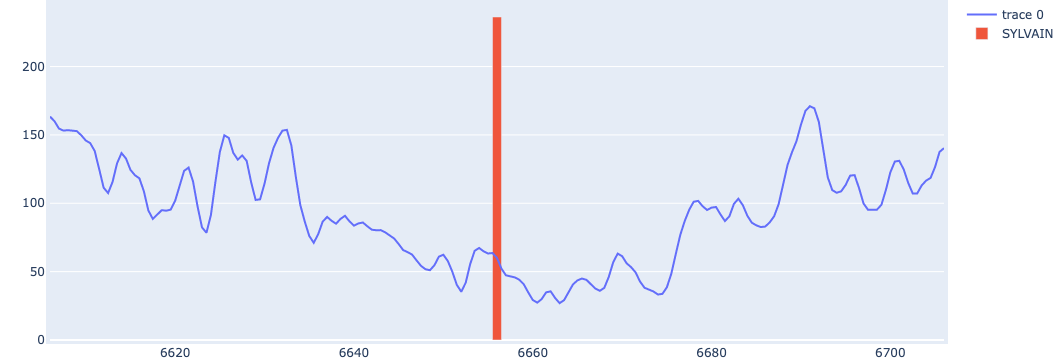

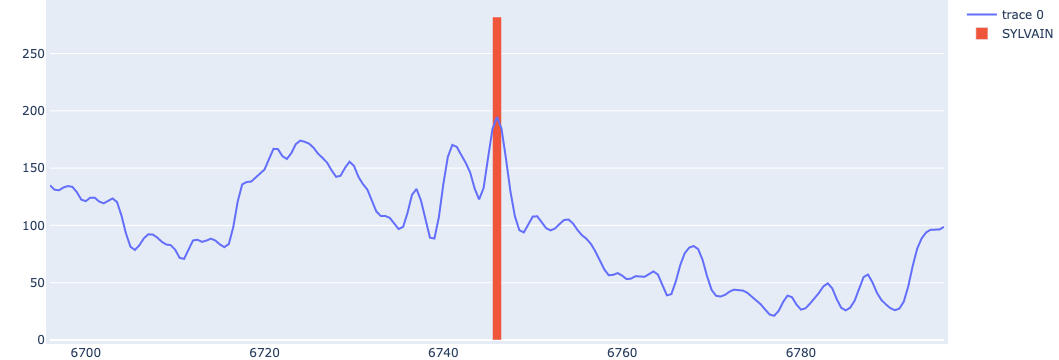

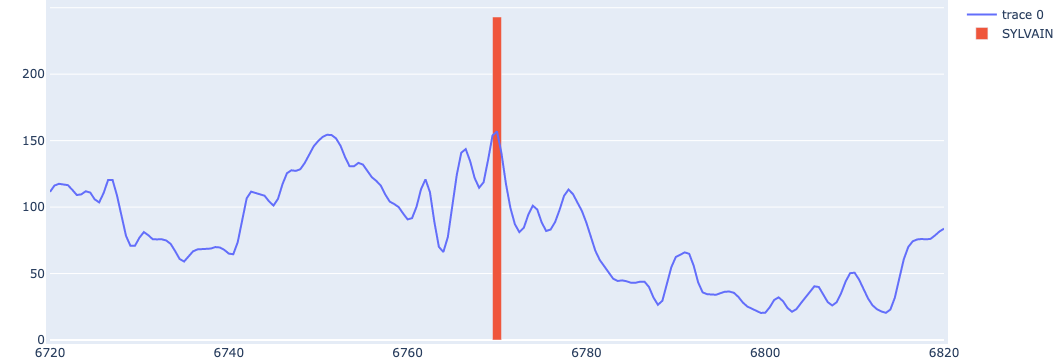

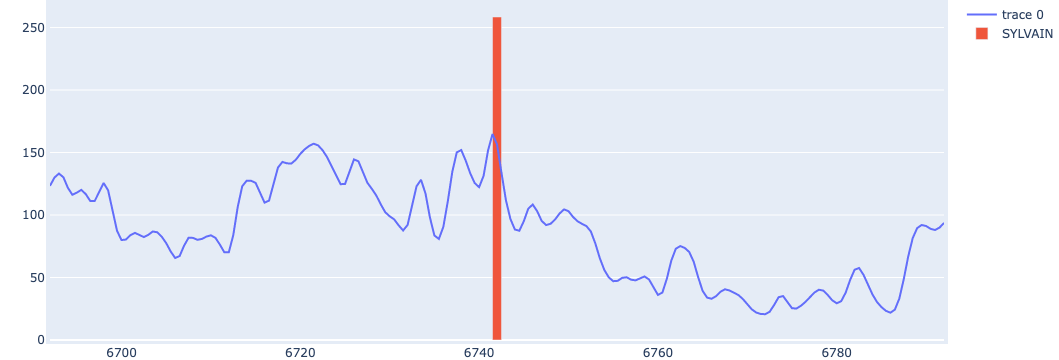

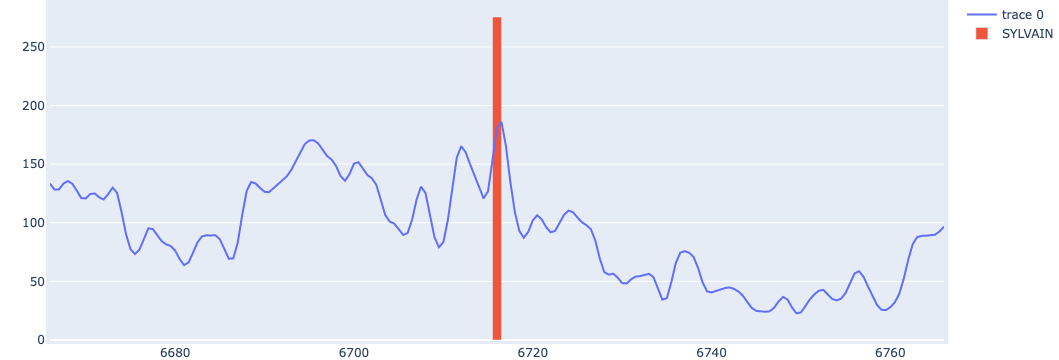

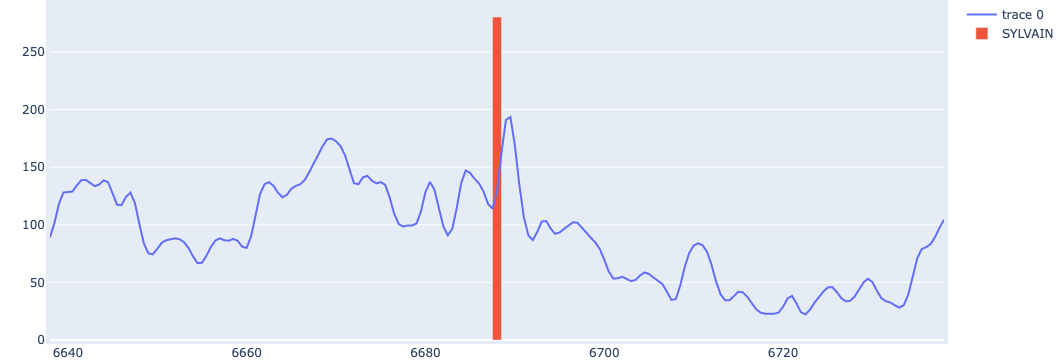

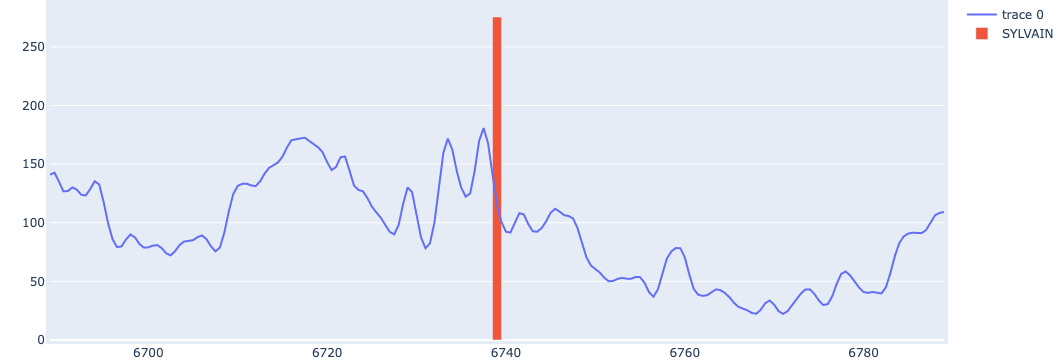

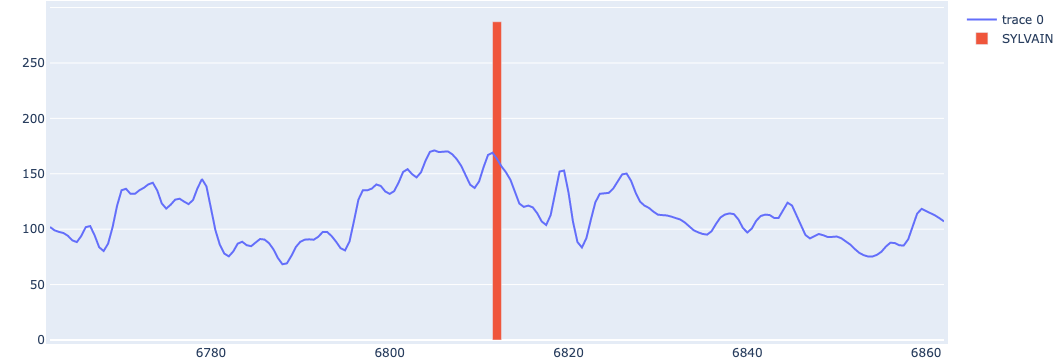

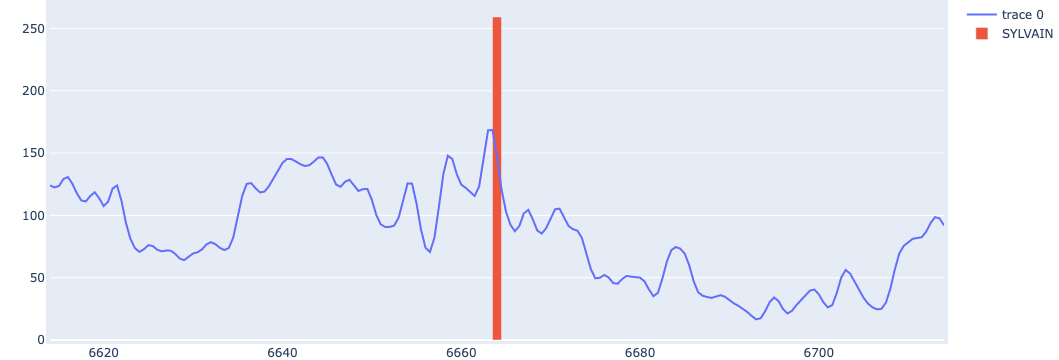

In [7]:
wellist = df_tops.index.tolist()

layout = go.Layout(
    height=120,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=20,
        t=0,
        pad=4
    )
)

def plot_pred(wellname,top_name,wsize):
    df_temp = df_logs[df_logs["wellName"]==wellname]

    true_top = df_tops.loc[wellname][top_name]
    if true_top > 0:
        ctr = df_temp[df_temp["DEPTH"]==true_top].index[0]
        true_log = df_temp.loc[ctr-wsize:ctr+wsize]

        bar = go.Bar( x = [true_top],y = [ df_temp["GR"].max()  ],name = top, width = 1)
        data = [go.Scatter(x=true_log.DEPTH,y=true_log.GR),bar]
  
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
    
for well in wellist[0:10]:  
    plot_pred(well,top,100)

In [8]:
from hacktops.evaluate import recall_tops

recall, mae, df_res = recall_tops(df_tops,df_tops,tolerance = 10)
print("recall {0}, mae {1}".format(recall,mae))
df_res.head(50)

recall 1.0, mae 0.0


,MARCEL,CONRAD,SYLVAIN,MARCEL_pred,CONRAD_pred,SYLVAIN_pred,MARCEL_ae,MARCEL_tp,CONRAD_ae,CONRAD_tp,SYLVAIN_ae,SYLVAIN_tp
wellName,,,,,,,,,,,,
512320698.0,6398.0,6661.0,6638.0,6398.0,6661.0,6638.0,0.0,True,0.0,True,0.0,True
512320699.0,6407.0,6676.0,6656.0,6407.0,6676.0,6656.0,0.0,True,0.0,True,0.0,True
512320928.0,6520.0,6793.0,6746.0,6520.0,6793.0,6746.0,0.0,True,0.0,True,0.0,True
512320970.0,6544.0,6816.0,6770.0,6544.0,6816.0,6770.0,0.0,True,0.0,True,0.0,True
512320971.0,6510.0,6789.0,6742.0,6510.0,6789.0,6742.0,0.0,True,0.0,True,0.0,True
512320972.0,6488.0,6760.0,6716.0,6488.0,6760.0,6716.0,0.0,True,0.0,True,0.0,True
512320973.0,6466.0,6735.0,6688.0,6466.0,6735.0,6688.0,0.0,True,0.0,True,0.0,True
512320974.0,6512.0,6782.0,6739.0,6512.0,6782.0,6739.0,0.0,True,0.0,True,0.0,True
512320980.0,6590.0,NaN,6812.0,6590.0,NaN,6812.0,0.0,True,NaN,False,0.0,True
